In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/  # upload gson file to colab
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download iashiqul/brain-stroke-prediction-ct-scan-image-dataset

mkdir: cannot create directory ‘/root/.kaggle’: File exists
brain-stroke-prediction-ct-scan-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip '/content/brain-stroke-prediction-ct-scan-image-dataset.zip'

Archive:  /content/brain-stroke-prediction-ct-scan-image-dataset.zip
replace Brain_Stroke_CT-SCAN_image/Test/Normal/100 (14).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models,layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,MaxPool2D, Flatten, Dense, Dropout

In [ ]:
Train_path='/content/Brain_Stroke_CT-SCAN_image/Train'
Test_path='/content/Brain_Stroke_CT-SCAN_image/Test'
Valid_path='/content/Brain_Stroke_CT-SCAN_image/Validation'

In [ ]:
TrainData=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [ ]:
Training_Data=TrainData.flow_from_directory(
    Train_path,
    target_size=(224,224),
    batch_size=20,
    class_mode='categorical'
)

Found 1843 images belonging to 2 classes.


In [ ]:
ValidData=ImageDataGenerator(rescale=1./255)
Validation_Data=ValidData.flow_from_directory(
    Valid_path,
    target_size=(224,224),
    batch_size=20,
    class_mode='categorical'
)

Found 235 images belonging to 2 classes.


In [ ]:
TestData=ImageDataGenerator(rescale=1./255)
Testing_Data=TestData.flow_from_directory(
    Test_path,
    target_size=(224,224),
    batch_size=20,
    class_mode='categorical'
)

Found 437 images belonging to 2 classes.


In [ ]:
train_image,train_labels=next(Training_Data)

In [ ]:
IMAGE_SIZE=224
model = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
     Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dropout(0.25),
    Dense(10,activation='relu'),
    Dense(2, activation='softmax') #sigmoid for binary
])

In [ ]:
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [ ]:
batch_size = 100
EPOCHS=50
hist = model.fit(Training_Data,
                  epochs=EPOCHS,
                 batch_size=batch_size,
                 verbose=1,
                 validation_data=Validation_Data 
                )

Epoch 1/50
93/93 [==============================] - 35s 335ms/step - loss: 0.6861 - accuracy: 0.5719 - val_loss: 0.6672 - val_accuracy: 0.6681
Epoch 2/50
93/93 [==============================] - 25s 263ms/step - loss: 0.6805 - accuracy: 0.5898 - val_loss: 0.6582 - val_accuracy: 0.6681
Epoch 3/50
93/93 [==============================] - 24s 262ms/step - loss: 0.6781 - accuracy: 0.5898 - val_loss: 0.6506 - val_accuracy: 0.6681
Epoch 4/50
93/93 [==============================] - 25s 268ms/step - loss: 0.6783 - accuracy: 0.5898 - val_loss: 0.6506 - val_accuracy: 0.6681
Epoch 5/50
93/93 [==============================] - 24s 263ms/step - loss: 0.6792 - accuracy: 0.5898 - val_loss: 0.6536 - val_accuracy: 0.6681
Epoch 6/50
93/93 [==============================] - 24s 263ms/step - loss: 0.6769 - accuracy: 0.5898 - val_loss: 0.6433 - val_accuracy: 0.6681
Epoch 7/50
93/93 [==============================] - 24s 261ms/step - loss: 0.6778 - accuracy: 0.5882 - val_loss: 0.6484 - val_accuracy: 0.6681

In [ ]:
test_score = model.evaluate(Testing_Data)


22/22 [==============================] - 2s 83ms/step - loss: 0.6368 - accuracy: 0.7025


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

In [ ]:
batch_size = 100
target_names = ['Normal','Stroke']  # data labels
Y_pred = model.predict_generator(Testing_Data)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)

<ipython-input-16-aa63226341b0>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(Testing_Data)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
cm = confusion_matrix(Testing_Data.classes, y_pred)

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap = plt.cm.Blues):
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix, Without Normalization')
    
    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment='center', color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

In [ ]:
cm=confusion_matrix(Testing_Data.classes,y_pred)

Confusion Matrix, Without Normalization
[[307   0]
 [130   0]]


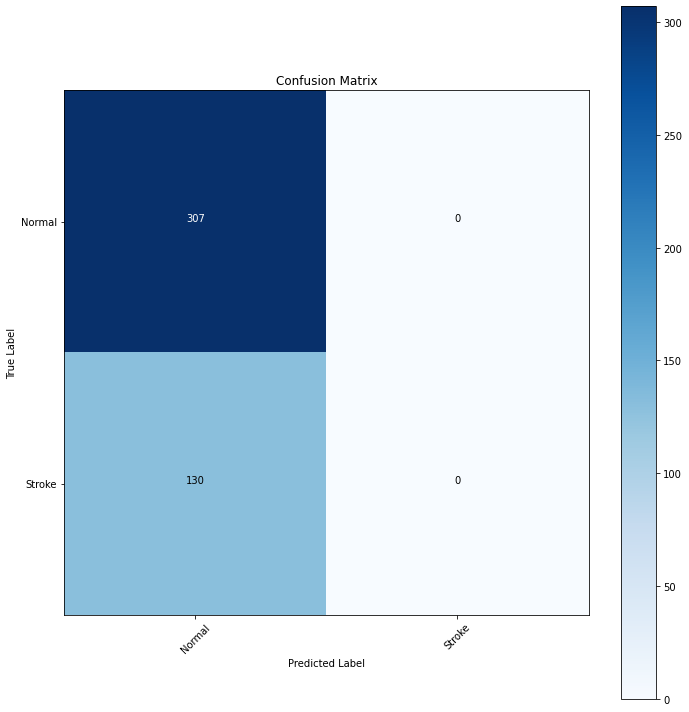

In [ ]:
target_names=['Normal','Stroke']
plot_confusion_matrix(cm=cm, classes=target_names, title = 'Confusion Matrix')